In [1]:
model_path_controlled = 'models/pymf6'
name = 'transport'

In [2]:
from matplotlib import pyplot as plt
from pymf6.mf6 import MF6
from pymf6.modeling_tools.plotting import show_heads, show_well_head, show_concentration
from pymf6.modeling_tools.make_model import get_simulation

In [3]:
mf6 = MF6(model_path_controlled + '/mfsim.nam', use_modflow_api=False)

In [4]:
mf6

pymf6 version:,1.2.1.dev33+g2e19ae1a.d20230603
xmipy version:,1.3.1
modflowapi version:,0.1.0
ini file path:,/Users/mike/pymf6.ini
dll file path:,/Users/mike/hydrocomputing/projects/2021/003_ModSimple_Phase2/Bearbeitung/MODFLOW6/mf6.4.1/bin_arm/libmf6.dylib
MODFLOW version:,6.4.1


In [5]:
sim = mf6.simulation

In [6]:
sim

modeltype,namefile,modelname
gwf6,transport.nam,TRANSPORT
gwt6,gwt_transport.nam,GWT_TRANSPORT


In [7]:
sim.models

[Model TRANSPORT 
 15 packages
 49 variables.,
 Model GWT_TRANSPORT 
 12 packages
 42 variables.]

In [8]:
sim.solution_groups

[Solution 1 
 1 packages
 68 variables.,
 Solution 2 
 1 packages
 68 variables.]

In [9]:
sim.TDIS

number of variables:,19


In [10]:
len(mf6.vars)

881

In [11]:
'SLN_2/X' in mf6.vars

True

In [12]:
mf6._mf6.get_subcomponent_count()

2

In [13]:
#[x for x in mf6.vars if 'WEL' in x]

In [14]:
head = mf6.vars['SLN_1/X']
conc = mf6.vars['SLN_2/X'].reshape(10, 10)
wel = mf6.vars['TRANSPORT/WEL-1/BOUND']
wel_index = 44

In [15]:
steps = mf6.steps(new_step_only=False)

In [16]:
for time_step in steps:
    target_conc = conc[1:-1, -1].max()
    # print(conc[:, -1])
    if target_conc > 2.5:
        wel[:] = -0.4
    elif target_conc > 2.4:
        wel[:] = -0.3
    elif target_conc > 2.2:
        wel[:] = -0.25
    elif target_conc > 2.1:
        wel[:] = -0.2
    elif target_conc < 1.9:
        wel[:] = 0

In [17]:
print(conc[1:-1, -1].max())

1.995554653599848


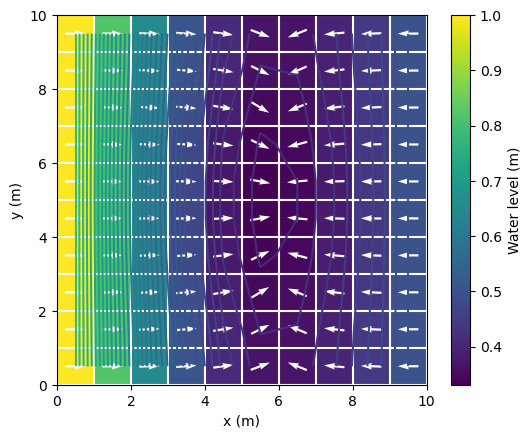

In [20]:
show_heads(model_path=model_path_controlled, name=name, title='');

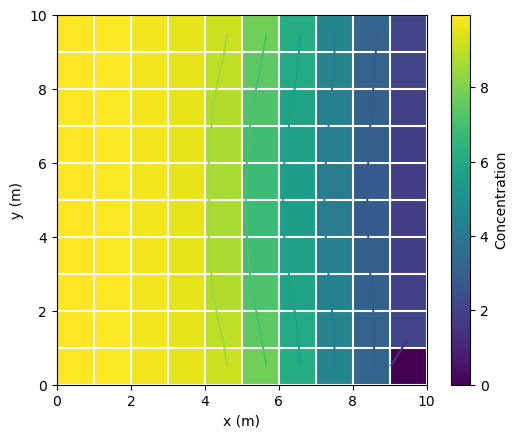

In [19]:
show_concentration(model_path=model_path_controlled, name=name);